In [ ]:
!pip install pyLDAvis
!pip install --upgrade --force-reinstall pandas numpy==1.26.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 79.2 MB/s 

In [ ]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

import pymc as pm
import arviz as az

from gensim import corpora
from gensim.models import LdaModel

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Q1

In [ ]:
# DO NOT MODIFY THIS CODE
website_visits_data = np.loadtxt('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/website_visits.csv', delimiter=',')

## (a)

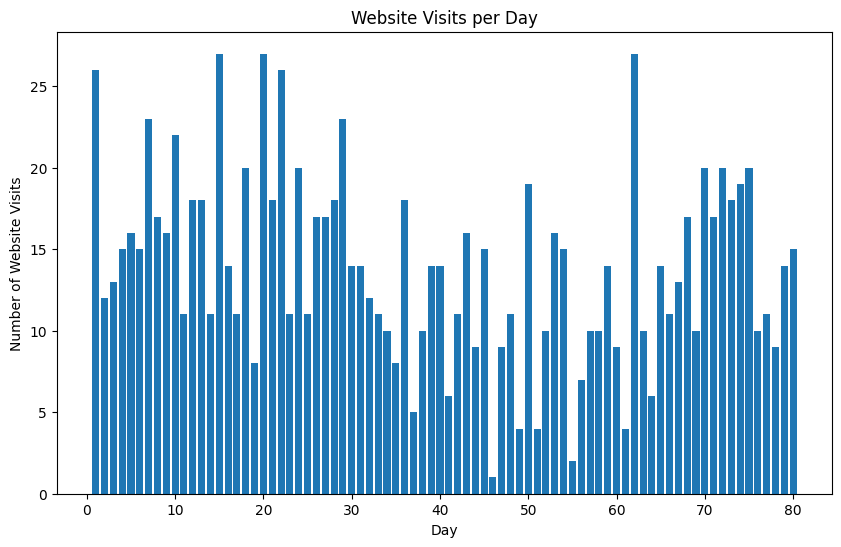

In [ ]:
# YOUR CODE STARTS HERE
plt.figure(figsize=(10,6))
plt.bar(range(1, len(website_visits_data) + 1), website_visits_data)
plt.xlabel('Day')
plt.ylabel('Number of Website Visits')
plt.title('Website Visits per Day')
plt.show()


**Enter your answer here:**
Based on the bar chart, we can observe that there at least two potential switchpoints. From Days 0-30 the visit count is generally high and stable. From Day 30-60, there is an observed dip in visits, with most days showing counts from 0-10. From Day 60-80, it seems to pick up again, looking mor similar to Day 0-30. This shows that there is one switchpoint at around day 30 and another around day 60.

## (b)

In [ ]:
# DO NOT MODIFY THIS CODE

param_names = ['tau_1', 'tau_2', 'lambda_1', 'lambda_2', 'lambda_3']

double_switchpoint_model = pm.Model()

with double_switchpoint_model:

  # Define priors
  # YOUR CODE STARTS HERE (FILL IN THE BLANKS)
  alpha = np.mean(website_visits_data)
  tau_1 = pm.DiscreteUniform("tau_1", lower=0, upper=79)
  tau_2 = pm.DiscreteUniform("tau_2", lower=0, upper=79)
  lambda_1 = pm.Exponential("lambda_1", lam=alpha)
  lambda_2 = pm.Exponential("lambda_2", lam=alpha)
  lambda_3 = pm.Exponential("lambda_3", lam=alpha)
  idx = np.arange(len(website_visits_data))
  lambda_12 = pm.math.switch(tau_1 < idx, lambda_1, lambda_2)
  lambda_ = pm.math.switch(tau_2 < idx, lambda_12, lambda_3)

  # Define likelihood (conditioned on observed data)
  # YOUR CODE STARTS HERE (FILL IN THE BLANK)
  likelihood = pm.Poisson("likelihood", mu=lambda_, observed=website_visits_data)

  # Sample from posterior
  # YOUR CODE STARTS HERE (FILL IN THE BLANK)
  trace = pm.sample(1000, random_seed=45, progressbar=False)

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


## (c)

In [ ]:
# Function to: (a) plot histogram of posterior samples (b) display mean and 94% HDI of posterior samples

def plot_posterior(param_name, trace):

    # (a) Plot histogram of posterior samples of passed parameter
    # YOUR CODE STARTS HERE
    y = trace.posterior[param_name].values.flatten()
    ax = sns.histplot(y)
    ax.set_xlim(y.min(), y.max())  # Setting x-axis limits
    ax.set_xlabel(param_name)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Posterior distribution of {param_name}')
    # (b) Display mean and 94% HDI of posterior samples of passed parameter (round to 2 decimal places)
    # YOUR CODE STARTS HERE
    print(f"\nMean: {round(np.mean(y), 2)}")
    hdi = az.hdi(y)
    print(f"94% HDI: [{round(hdi[0], 2)} {round(hdi[1], 2)}]")



Mean: 41.0
94% HDI: [8 77]


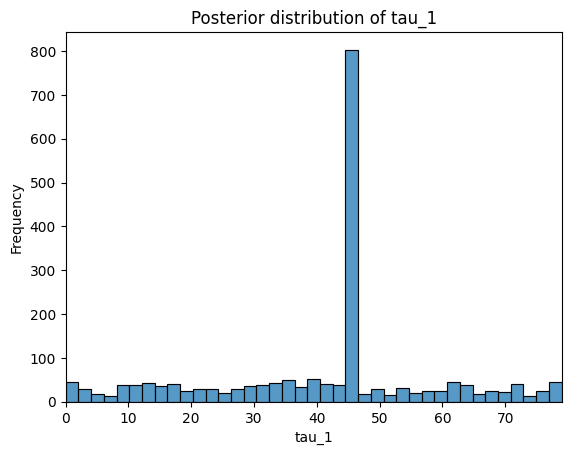


Mean: 61.34
94% HDI: [44 79]


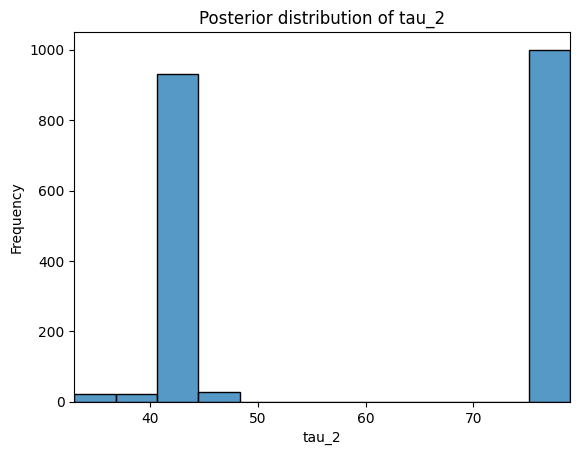


Mean: 4.47
94% HDI: [0.0 9.39]


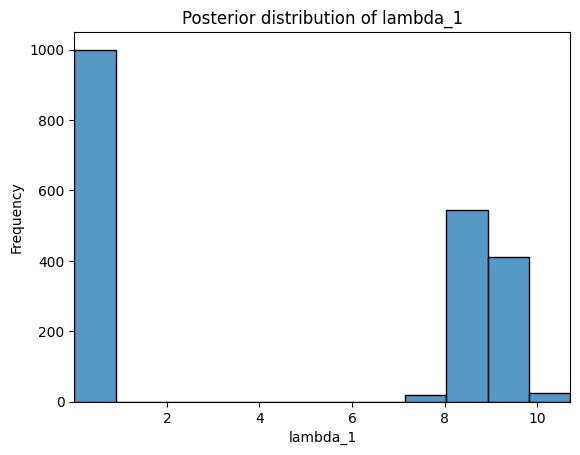


Mean: 0.1
94% HDI: [0.0 0.26]


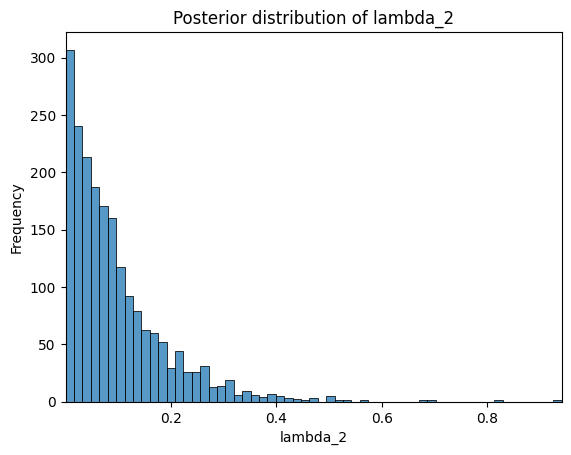


Mean: 11.79
94% HDI: [10.99 12.53]


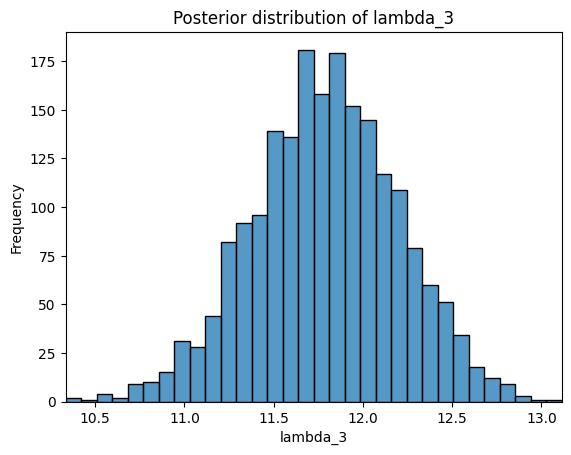

In [ ]:
# DO NOT MODIFY THIS CODE
for param_name in param_names:
    plot_posterior(param_name, trace)
    plt.show()

**Enter answer here:**
*   (i) The current model is not a good fit. Based on the HDI ranges of [8, 77] for tau_1 and [44, 79] for tau_2, the posterior distributions are ambiguous and unstable.
*   (ii) The historgrams do not align with the trend from part (a). We observed that the switchpoints were at around day 30 and day 60. These histograms show that there is a peak at 45 which is later than the the observed trend.





## (d)

In [ ]:
# DO NOT MODIFY THIS CODE

double_switchpoint_model_adjusted = pm.Model()

with double_switchpoint_model_adjusted:

  # Define priors
  # YOUR CODE STARTS HERE
  alpha = np.mean(website_visits_data)
  tau_1 = pm.DiscreteUniform("tau_1", lower=0, upper=78)
  tau_2 = pm.DiscreteUniform("tau_2", lower=1, upper=79)
  pm.Potential("tau_constraint", pm.math.switch(tau_2 > tau_1, 0, -np.inf))
  lambda_1 = pm.Exponential("lambda_1", lam=alpha)
  lambda_2 = pm.Exponential("lambda_2", lam=alpha)
  lambda_3 = pm.Exponential("lambda_3", lam=alpha)
  idx = np.arange(len(website_visits_data))
  lambda_12 = pm.math.switch(idx < tau_1, lambda_1, lambda_2)
  lambda_ = pm.math.switch(idx < tau_2, lambda_12, lambda_3)

  # Define likelihood (conditioned on observed data)
  # YOUR CODE STARTS HERE
  likelihood = pm.Poisson("likelihood", mu=lambda_, observed=website_visits_data)

  # Sample from posterior
  # YOUR CODE STARTS HERE
  trace_adjusted = pm.sample(1000, random_seed=45, progressbar=False)

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


**Enter your answer here:**
In the original model, both tau_1 and tau_2, which indicate the switchpoints were defined over the same range which meant that the model could choose tau_1 and tau_2 in the wrong order. However, for this model it is important that tau_1 happens *before* tau_2. In the original model, there is a modelling deficiency because there is nothing saying that tau_2 > tau_1

To fix this, the constraint was added to make sure tau_2 was always greater than tau_1.




## (e)


Mean: 38.0
94% HDI: [36 40]


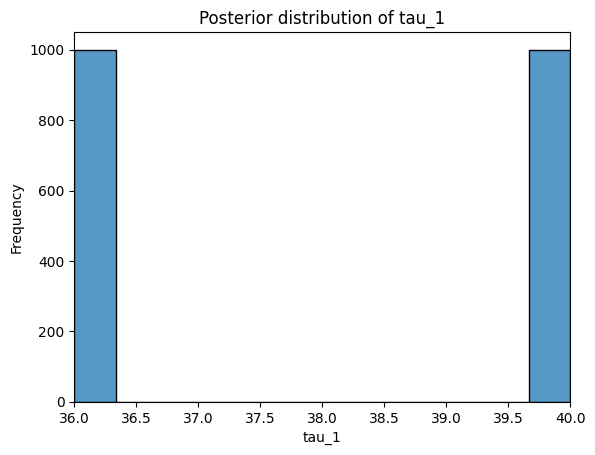


Mean: 39.0
94% HDI: [37 41]


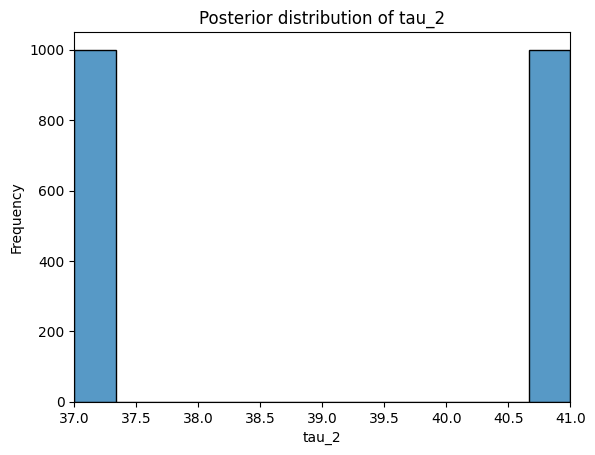


Mean: 11.76
94% HDI: [10.84 12.6]


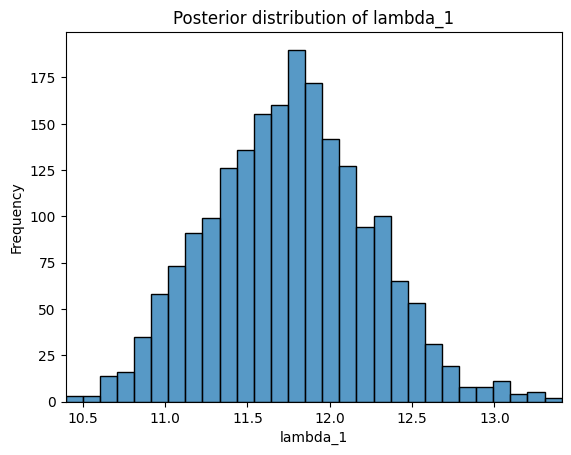


Mean: 0.44
94% HDI: [0.16 0.78]


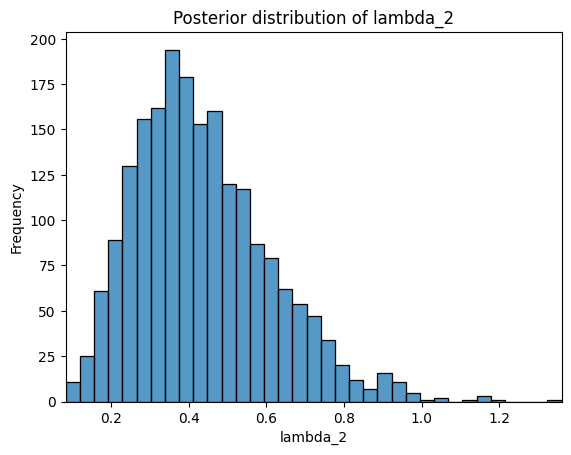


Mean: 9.1
94% HDI: [8.33 9.87]


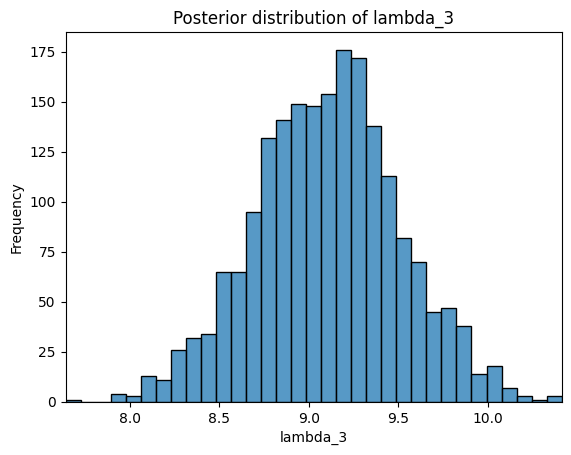

In [ ]:
# YOUR CODE GOES HERE
def plot_posterior_revised(param_name, trace):
    y = trace.posterior[param_name].values.flatten()
    ax = sns.histplot(y)
    ax.set_xlim(y.min(), y.max())  # Setting x-axis limits
    ax.set_xlabel(param_name)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Posterior distribution of {param_name}')
#calculate and display mean and 94% HDI
    print(f"\nMean: {round(np.mean(y), 2)}")
    hdi = az.hdi(y)
    print(f"94% HDI: [{round(hdi[0], 2)} {round(hdi[1], 2)}]")
for param_name in param_names:
    plot_posterior_revised(param_name, trace_adjusted)  # Using trace_adjusted from part (d)
    plt.show()

**Enter answer here:**



*   (i) the current model is a much better fit than the previous one since the HDI ranges are now concentrated at [36, 40] for tau_1 and [37, 41] for tau_2
*   (ii) the histograms align with the visual trends since in part (a) we noticed a switchpoint at around day 30. These histograms observe that switch point at day 36-40 which aligns more closely than the distinct switch point at day 45 in part (c).



# Q2

In [ ]:
topic_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/topic_dataset.csv')
topic_df["preprocessed"] = topic_df["preprocessed"].apply(lambda x: ast.literal_eval(x))
topic_df.head()

,document,preprocessed
0,Hi Xperts!\n\nHow can I move the cursor with t...,"[xperts, cursor, keyboard, cursor, key, mouse,..."
1,Where can I obtain a copy of the Open Look wid...,"[obtain, copy, open, look, widget, obtainable,..."
2,\nYou're right about the signal being strong. ...,"[right, signal, strong, live, west, philadelph..."
3,"\nHe's a Canadian ""thing"". Former coach of the...","[canadian, thing, coach, boston, bruin, colora..."
4,"\n\n Heck, I seem to feel like that *ev...","[heck, feel, like, time, including, cafeteria,..."


## (a)

In [ ]:
## YOUR CODE GOES HERE
texts = topic_df['preprocessed'].tolist()
dictionary = corpora.Dictionary(texts)
print('Number of unique tokens before pre-processing', len(dictionary))
stoplist = set(stopwords.words('english')).union(set(ENGLISH_STOP_WORDS))
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist
            if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)

dictionary.filter_extremes(no_below=2, no_above=0.5)

dictionary.compactify()
print('Number of unique tokens after pre-processing: ', len(dictionary))

corpus = [dictionary.doc2bow(text) for text in texts]


Number of unique tokens before pre-processing 49388
Number of unique tokens after pre-processing:  25104


## (b)

In [ ]:
# Train LDA model

# YOUR CODE GOES HERE
topic_model = LdaModel(corpus, id2word=dictionary, num_topics=10, iterations=100, eval_every=None, random_state=100, minimum_probability=0)



In [ ]:
# Display LDA visualization

# YOUR CODE GOES HERE
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(topic_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.055963  0.008531       1        1  20.780284
3      0.058367  0.089745       2        1  14.019759
6      0.000439 -0.125442       3        1  12.587743
5     -0.218932  0.049154       4        1  12.205720
0     -0.157940  0.000224       5        1  11.524367
9      0.042088  0.049562       6        1  11.014289
4      0.063127  0.040531       7        1   7.489208
2      0.103395 -0.098031       8        1   3.668419
1      0.031282 -0.131222       9        1   3.631323
8      0.134138  0.116949      10        1   3.078887, topic_info=          Term         Freq        Total Category  logprob  loglift
680   armenian  1765.000000  1765.000000  Default  30.0000  30.0000
127       game  2112.000000  2112.000000  Default  29.0000  29.0000
2593    israel   899.000000   899.000000  Default  28.0000  28.0000
89        team  1408.000000  1408.000000  Default  27.0000  27.0000
291     window  1868.000000  1868.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
453      group    59.600088   929.261337  Topic10  -5.8991   0.7339
303       book    51.266455   905.853453  Topic10  -6.0498   0.6088
133       left    50.201936   820.331418  Topic10  -6.0708   0.6869
425      world    48.848940   883.016433  Topic10  -6.0981   0.5860
131       know    50.731571  3007.540258  Topic10  -6.0603  -0.6017

[872 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
2633       1  0.982931      abiding
12172      9  0.945526  accelerated
13374      4  0.909969  accelerator
13374      5  0.074588  accelerator
2123       1  0.037628         adam
...      ...       ...          ...
1131       7  0.136169         zone
1131       8  0.356633         zone
1131       9  0.045390         zone
1131      10  0.071327         zone
14989     10  0.979837         zoom

[3684 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 7, 6, 1, 10, 5, 3, 2, 9])

## (c)

**Enter answer here:**


*   Topic 2: armenian, people, turkish, year, greek
  *   Topic Description: Armenian Genocide
  *   Justification: the presence of the words "armenian", "turkish", greek" and "people" indicate that this topic is related to the Armenian Genocide. Further down the list of the top salient words list it also includes the word "genocide" to further this conclusion.
*   Topic 3: game, team, year, season, player
  *   Topic Description: Sports
  *   Justification: the top five words are commonly associated with sporting evens, where there are teams and seasons.
*   Topic 4: window, file, server, program, available
  *   Topic Description: Computers/Software
  *   Justification: Words such as "window", "file", "server", "program", "available" suggest that the topic involves software functionalities, serveres, and file operations.




